In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environment import Environment
from simulations import calculate_ground_truth, run_simulation
from generate_valid_env import generate_centered_stable_weights
from ucb_agents import StationaryAgent, LatentARLinUCB, IntermediateAgent

In [11]:
def create_env_params(k, sigma_z, sigma_r):
    gammas = generate_centered_stable_weights(k, 2, 123) if k > 1 else [0.9]
    env_params = dict(gamma_0=0,
            mu_a=[0, 0],
            beta_a=[-1.0, 1.0],
            sigma_z=sigma_z,
            sigma_r=sigma_r,
            K=k,
            gammas=gammas,
            init_zs=np.ones(k)
            )
    np.random.seed(2024)
    env_params['init_zs'] = 10 * np.random.randn(env_params['K'])

    return env_params

## AGENTS ##
STAT_AGENT = StationaryAgent()
OUR_ALGORITHM = lambda s, env_params: LatentARLinUCB(s)
INTERMEDIATE_AGENT = lambda s, env_params: IntermediateAgent(env_params, s)

NUM_TIME_STEPS = 200
def run_test_simulation(env_params, s, exp_seed):
        stat_actions, stat_rewards, _ = run_simulation(Environment(env_params, T=NUM_TIME_STEPS), STAT_AGENT, exp_seed)
        our_actions, our_rewards, _ = run_simulation(Environment(env_params, T=NUM_TIME_STEPS), OUR_ALGORITHM(s, None), exp_seed)
        intermediate_agent = INTERMEDIATE_AGENT(0, env_params)
        intermediate_actions, intermediate_rewards,_ = run_simulation(Environment(env_params, T=NUM_TIME_STEPS), intermediate_agent, exp_seed)
        ground_truth = calculate_ground_truth(Environment(env_params, T=NUM_TIME_STEPS), exp_seed)
        optimal_actions = ground_truth['optimal action']
        optimal_rewards = ground_truth['optimal reward']

        return stat_rewards, our_rewards, intermediate_rewards, optimal_rewards, stat_actions, our_actions, intermediate_actions, optimal_actions

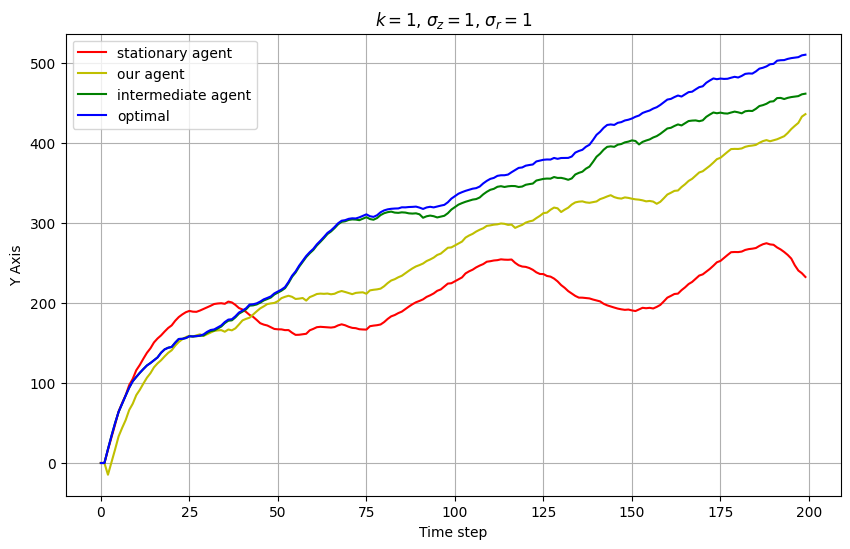

In [18]:
## EXPERIMENT SEED ##
EXP_SEED = 99
## ENVIRONMENT ##
k = 1
sigma_z = 1
sigma_r = 1
env_params = create_env_params(k, sigma_z, sigma_r)
# agent hyperparameter
s = k
stat_rewards, our_rewards, intermediate_rewards, optimal_rewards, stat_actions, our_actions, intermediate_actions, optimal_actions = run_test_simulation(env_params, s, EXP_SEED)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot([np.sum(stat_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='stationary agent', color='r')
plt.plot([np.sum(our_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='our agent', color='y')
plt.plot([np.sum(intermediate_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='intermediate agent', color='g')
plt.plot([np.sum(optimal_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='optimal', color='b')
plt.xlabel('Time step')
plt.ylabel('Y Axis')
plt.title(f'$k = {k}$, $\sigma_z = {sigma_z}$, $\sigma_r = {sigma_r}$')
plt.legend()
plt.grid()
plt.show()

In [21]:
stat_rewards = np.array(stat_rewards)
optimal_rewards = np.array(optimal_rewards)

In [ ]:
# SUSPICIOUS #
stat_rewards[np.where(stat_rewards > optimal_rewards)]

array([17.4667801 , 15.86154329, 16.46322375, 10.60038462, 12.63391839,
       10.74796527,  6.65384575,  7.73760809,  7.31407848,  5.67729178,
        7.35996589,  4.88071379,  4.79415535,  4.43642721,  3.26444368,
        5.78447941,  4.6179931 ,  3.29662699,  2.75850714,  1.62612686,
        1.94999704,  2.18929497,  4.22521078,  0.74291931,  2.97383304,
        3.95641102,  3.24209224,  1.63586677,  2.40077974,  1.86933299,
        3.20744435,  3.10292641,  2.90967613,  2.46934368,  1.67863233,
        1.94885253,  3.06602377,  1.96903325,  2.34153298,  3.28702685,
        1.69593875,  3.62800044,  3.68606579,  2.44102597,  4.99570962,
        2.61119422,  2.04531961,  2.88417018,  2.25133837,  1.03848952,
        2.01268969,  1.96280841,  4.44334286,  4.67774637,  2.20271494,
        2.36833391,  4.31611205,  3.49858318,  4.14127292,  2.64819083,
        3.98287392,  3.95687961,  1.50833978,  3.38691547,  3.98885934,
        4.31529336,  1.67998431,  3.74705709,  3.64163377,  3.49

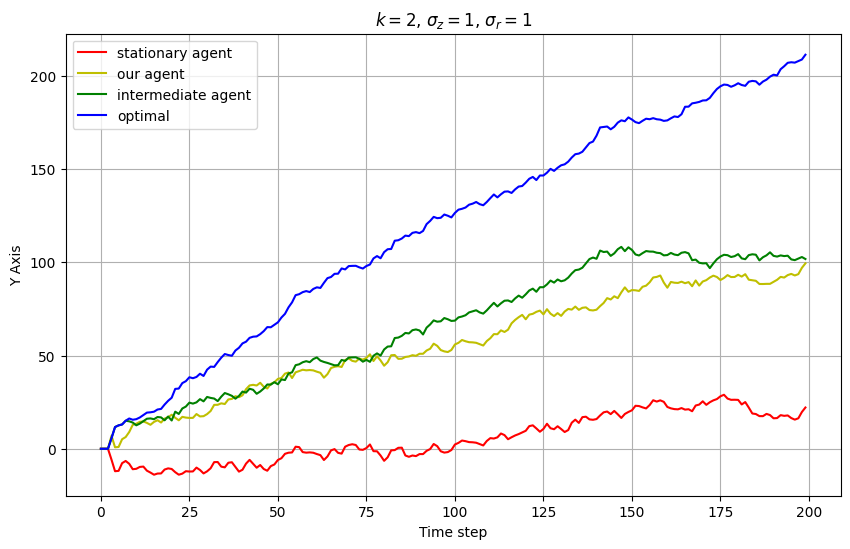

In [16]:
## EXPERIMENT SEED ##
EXP_SEED = 99
## ENVIRONMENT ##
k = 2
sigma_z = 1
sigma_r = 1
env_params = create_env_params(k, sigma_z, sigma_r)
# agent hyperparameter
s = k
stat_rewards, our_rewards, intermediate_rewards, optimal_rewards, stat_actions, our_actions, intermediate_actions, optimal_actions = run_test_simulation(env_params, s, EXP_SEED)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot([np.sum(stat_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='stationary agent', color='r')
plt.plot([np.sum(our_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='our agent', color='y')
plt.plot([np.sum(intermediate_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='intermediate agent', color='g')
plt.plot([np.sum(optimal_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='optimal', color='b')
plt.xlabel('Time step')
plt.ylabel('Y Axis')
plt.title(f'$k = {k}$, $\sigma_z = {sigma_z}$, $\sigma_r = {sigma_r}$')
plt.legend()
plt.grid()
plt.show()

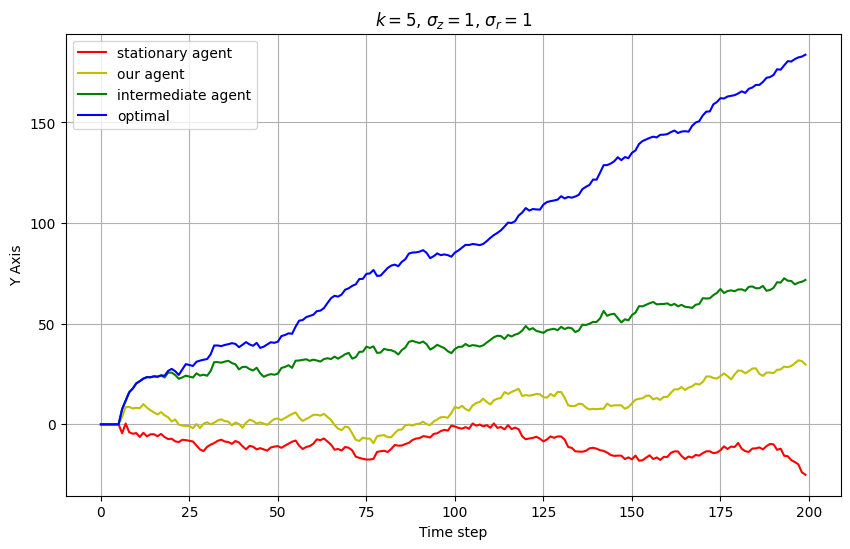

In [17]:
## EXPERIMENT SEED ##
EXP_SEED = 99
## ENVIRONMENT ##
k = 5
sigma_z = 1
sigma_r = 1
env_params = create_env_params(k, sigma_z, sigma_r)
# agent hyperparameter
s = k
stat_rewards, our_rewards, intermediate_rewards, optimal_rewards, stat_actions, our_actions, intermediate_actions, optimal_actions = run_test_simulation(env_params, s, EXP_SEED)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot([np.sum(stat_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='stationary agent', color='r')
plt.plot([np.sum(our_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='our agent', color='y')
plt.plot([np.sum(intermediate_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='intermediate agent', color='g')
plt.plot([np.sum(optimal_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='optimal', color='b')
plt.xlabel('Time step')
plt.ylabel('Y Axis')
plt.title(f'$k = {k}$, $\sigma_z = {sigma_z}$, $\sigma_r = {sigma_r}$')
plt.legend()
plt.grid()
plt.show()

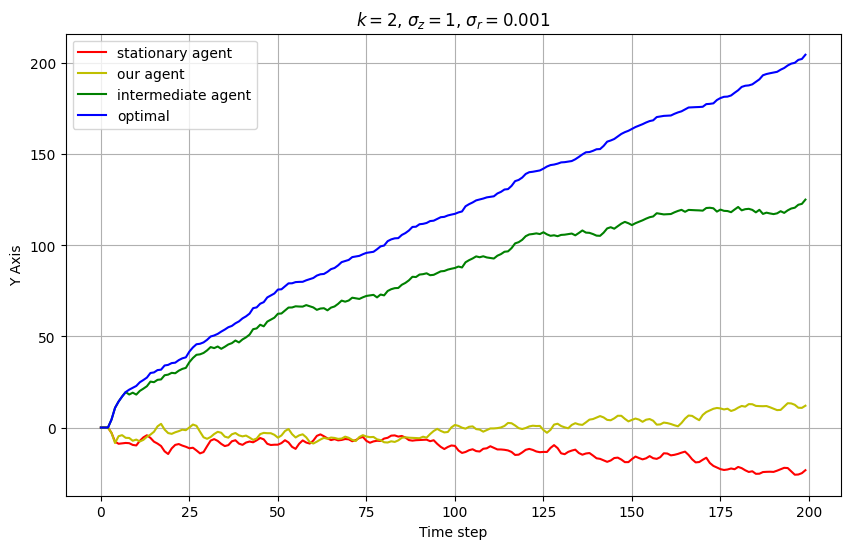

In [26]:
## EXPERIMENT SEED ##
EXP_SEED = 123
## ENVIRONMENT ##
k = 2
sigma_z = 1
sigma_r = 1e-3
env_params = create_env_params(k, sigma_z, sigma_r)
# agent hyperparameter
s = 10
stat_rewards, our_rewards, intermediate_rewards, optimal_rewards, stat_actions, our_actions, intermediate_actions, optimal_actions = run_test_simulation(env_params, s, EXP_SEED)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot([np.sum(stat_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='stationary agent', color='r')
plt.plot([np.sum(our_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='our agent', color='y')
plt.plot([np.sum(intermediate_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='intermediate agent', color='g')
plt.plot([np.sum(optimal_rewards[k:t]) for t in range(NUM_TIME_STEPS)], label='optimal', color='b')
plt.xlabel('Time step')
plt.ylabel('Y Axis')
plt.title(f'$k = {k}$, $\sigma_z = {sigma_z}$, $\sigma_r = {sigma_r}$')
plt.legend()
plt.grid()
plt.show()